<a href="https://colab.research.google.com/github/snlynnoo/customer-segamentation-banking/blob/main/customer_segmentation_Ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentaion 

### Import Dataset & Libraries


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
import warnings

# Set max row and col for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)

# Supress warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')

### Data Exploration

In [4]:
# Explore shape of dataset
df.shape

(1048567, 9)

In [5]:
# View dataset
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


#### Descriptive Statistics

In [7]:
# Custom Function to generate descriptive statics for numerical variables
def describe_custom(df):
    desc = df.describe()
    skewness = df.skew()
    median = df.median()
    mode = df.mode()
    desc.loc['skewness'] = skewness
    desc.loc['median'] = median
    desc.loc['mode'] = mode.iloc[0]
    return desc

In [8]:
# Generate descriptive stats
describe_custom(df).T

,count,mean,std,min,25%,50%,75%,max,skewness,median,mode
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08,60.530334,16792.18,0.0
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05,-0.836924,164226.00,193303.0
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06,47.337252,459.03,100.0


#### Missing values

In [9]:
# Check missing values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [10]:
# Calculate percentage of missing values
missing_values = df.isnull().sum()
percent_missing = round((missing_values / len(df)) * 100, 2)
print(percent_missing)

TransactionID              0.00
CustomerID                 0.00
CustomerDOB                0.32
CustGender                 0.10
CustLocation               0.01
CustAccountBalance         0.23
TransactionDate            0.00
TransactionTime            0.00
TransactionAmount (INR)    0.00
dtype: float64


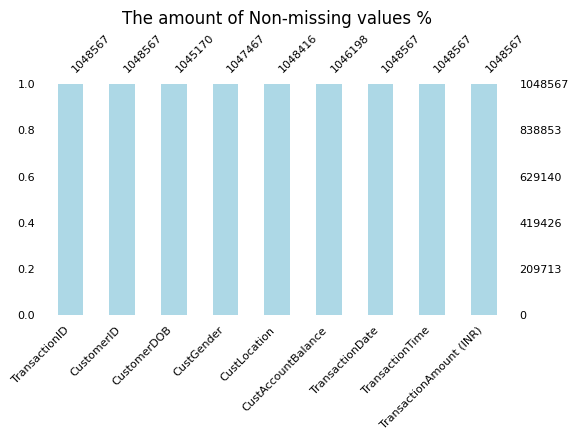

In [11]:
# Plot non-missing value %
msno.bar(df, color = "lightblue", figsize = (6,3), fontsize = 8)
plt.title("The amount of Non-missing values %", fontsize = 12)
plt.show()

#### Duplicates

In [12]:
# Check for duplicates
df[df.duplicated() == True ].count()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### Data Pre-processing


#### Drop missing values

In [13]:
# Drop missing values data
df1 = df.dropna()

# Print the shape of dataframes
print('Original dataframe', df.shape)
print('New dataframe', df1.shape)

Original dataframe (1048567, 9)
New dataframe (1041614, 9)


#### Covert to DateTime data type

In [14]:
# convert type of columns TransactionDate, CustomerDOB from string to datetime
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])
df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'])
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [15]:
# Verify data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [16]:
# List transactions date 
df1['TransactionDate'].value_counts().sort_index()

2016-01-08    20277
2016-01-09    22179
2016-02-08    20787
2016-02-09    22718
2016-03-08    20446
2016-03-09    26292
2016-04-08    20535
2016-04-09    26420
2016-05-08    20949
2016-05-09    21116
2016-06-08    26416
2016-06-09    19510
2016-07-08    27084
2016-07-09    20999
2016-08-08    20883
2016-08-09    21648
2016-08-13    26738
2016-08-14    25407
2016-08-15    24020
2016-08-16    20278
2016-08-17    20960
2016-08-18    19338
2016-08-19    18559
2016-08-20    21188
2016-08-21    22833
2016-08-22    18441
2016-08-23    17239
2016-08-24    17893
2016-08-25    18424
2016-08-26    17615
2016-08-27    21349
2016-08-28    20944
2016-08-29    16700
2016-08-30    17273
2016-08-31    19586
2016-09-08    21673
2016-09-09    21444
2016-09-13    20506
2016-09-14    19845
2016-09-15    19610
2016-09-18    14622
2016-09-22     6925
2016-09-23     3460
2016-09-25     8127
2016-09-26    12376
2016-09-27     7401
2016-09-30     1935
2016-10-08    21457
2016-10-09    25628
2016-10-16        3


All the transactions took place are within a year of 2016 starting from Jan to Dec

#### Drop invalid DOB

In [17]:
df1['CustomerDOB'].value_counts()

1800-01-01    56292
1989-01-01      809
1990-01-01      784
1991-06-08      698
1991-01-01      665
              ...  
2051-02-12        1
2052-03-20        1
2047-09-26        1
2041-04-10        1
2044-10-24        1
Name: CustomerDOB, Length: 17233, dtype: int64

In [18]:
filtered_df = df1.loc[df1['CustomerDOB'].dt.year >= 2006]
filtered_df['CustomerDOB'].value_counts()

2054-12-28    214
2069-01-01    180
2071-01-06    170
2070-01-12    150
2072-01-11    140
             ... 
2061-04-29      1
2043-03-12      1
2053-07-30      1
2012-02-18      1
2044-10-24      1
Name: CustomerDOB, Length: 7603, dtype: int64

There are exceptionally high number of customers with DOB as 1800-01-01 as compared to the rest, this is probably the default value. A customer being born in 1800 would mean he/she will be 216 years old in 2016, which doesnt make sense, hence these data will be deleted.

Also, any DOB later than 2006 will be removed since in India, the legal age to have a bank account is 10yo. 

In [19]:
# Remove data for DOB = 1800-01-01 or DOB >2006
df1 = df1.drop(df1[(df1['CustomerDOB'] == '1800-01-01') | (df1['CustomerDOB'].dt.year >= 2006)].index)
df1['CustomerDOB'].value_counts().sort_index()

1973-01-01    83
1973-01-02    32
1973-01-03    49
1973-01-04    18
1973-01-05    48
              ..
2005-09-25     1
2005-09-27     3
2005-10-16     4
2005-10-27     3
2005-11-07     1
Name: CustomerDOB, Length: 9629, dtype: int64

### Feature Engineering

*   **CustAge**: Customer Age based on DOB feature
*   **Recency**: Number of days since the last purchase or order
*   **Frequency**: Number of transactions made
*   **Monetary**: Total amount spent

#### Create Age

In [20]:
#Calculate customer age:
df1['CustAge'] =df1['TransactionDate'].dt.year - df1['CustomerDOB'].dt.year
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24


In [21]:
# list customers age
df1['CustAge'].value_counts().sort_index()

11       30
12       75
13       69
14       98
15      142
16      269
17      688
18     1936
19     7155
20    12480
21    20704
22    36179
23    53142
24    66484
25    71185
26    72616
27    69156
28    62905
29    58606
30    52897
31    46096
32    41105
33    35701
34    32364
35    27369
36    25122
37    22126
38    19605
39    16626
40    15057
41    12293
42    10952
43     9908
Name: CustAge, dtype: int64

In [22]:
# calculate the minimum (first transaction)
df1['TransactionDate1']=df1['TransactionDate'] 

# calculate the maximum (last transaction)
df1['TransactionDate2']=df1['TransactionDate'] 
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge,TransactionDate1,TransactionDate2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,2016-02-08,2016-02-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20,2016-02-08,2016-02-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43,2016-02-08,2016-02-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28,2016-02-08,2016-02-08
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24,2016-02-08,2016-02-08


#### Create Frequency and Monetary 

In [23]:
# Construct raw data for clustering from transactional data
RFM_df = df1.groupby("CustomerID").agg({
                                        "TransactionID" : "count", 
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "last",
                                        "TransactionAmount (INR)" : "sum",
                                        "CustAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

# Reset index of new dataframe
RFM_df = RFM_df.reset_index()
RFM_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,120180.54,5106.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.49,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,161848.76,1455.0,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.18,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010028,1,F,DELHI,296828.37,557.0,28.0,2016-08-29,2016-08-29,2016-08-29


In [24]:
# Rename Columns to Frequency and Monetary
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)
RFM_df.rename(columns={"TransactionAmount (INR)":"Monetary"},inplace=True)

In [25]:
#confirm customer ID is unique
RFM_df[RFM_df.duplicated() == True].count()

CustomerID            0
Frequency             0
CustGender            0
CustLocation          0
CustAccountBalance    0
Monetary              0
CustAge               0
TransactionDate2      0
TransactionDate1      0
TransactionDate       0
dtype: int64

#### Create Recency feature

In [26]:
RFM_df['Recency'] = (RFM_df['TransactionDate2'] - RFM_df['TransactionDate1']).dt.days
RFM_df.head()

,CustomerID,Frequency,CustGender,CustLocation,CustAccountBalance,Monetary,CustAge,TransactionDate2,TransactionDate1,TransactionDate,Recency
0,C1010011,2,F,NOIDA,120180.54,5106.0,28.5,2016-09-26,2016-09-08,2016-09-17,18
1,C1010012,1,M,MUMBAI,24204.49,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,0
2,C1010014,2,F,MUMBAI,161848.76,1455.0,28.0,2016-07-08,2016-01-08,2016-04-08,182
3,C1010018,1,F,CHAMPARAN,496.18,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,0
4,C1010028,1,F,DELHI,296828.37,557.0,28.0,2016-08-29,2016-08-29,2016-08-29,0


In [27]:
RFM_df.Recency.value_counts()

0      669064
1        2677
31       2033
30       1994
61       1726
        ...  
287        15
58         12
265        10
266         7
206         5
Name: Recency, Length: 252, dtype: int64

Since zeor day means the most recent day, they are all replace with 1.

In [28]:
# Convert zero recency to 1
RFM_df['Recency'] = RFM_df['Recency'].apply(lambda x: 1 if x==0 else x)
RFM_df.Recency.value_counts()

1      671741
31       2033
30       1994
61       1726
5        1472
        ...  
287        15
58         12
265        10
266         7
206         5
Name: Recency, Length: 251, dtype: int64

### EDA After Feature Engineering

In [29]:
# Create dataframe for EDA
EDA_df = RFM_df.copy()
EDA_df.drop(columns=["CustomerID","TransactionDate2","TransactionDate1","TransactionDate"],inplace=True)

In [30]:
# Generate dataframe info
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Frequency           777356 non-null  int64  
 1   CustGender          777356 non-null  object 
 2   CustLocation        777356 non-null  object 
 3   CustAccountBalance  777356 non-null  float64
 4   Monetary            777356 non-null  float64
 5   CustAge             777356 non-null  float64
 6   Recency             777356 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 41.5+ MB


#### Outliers detection

In [33]:
# Outlier detection using Z-score method
from scipy import stats

# Calculate the Z-score for the entire dataframe
EDA_df_outliers = EDA_df.drop(['CustLocation', 'CustGender'], axis = 1)
z_scores = stats.zscore(EDA_df_outliers)

# Identify outliers using a Z-score threshold of 3
outliers = df1.where(np.abs(z_scores) > 3)

# Print the outliers
print("Outliers: ", outliers.dropna())

Outliers:  Empty DataFrame
Columns: [TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR), CustAge, TransactionDate1, TransactionDate2]
Index: []


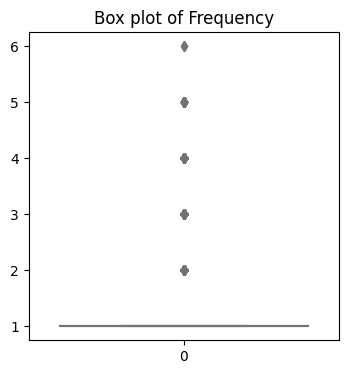

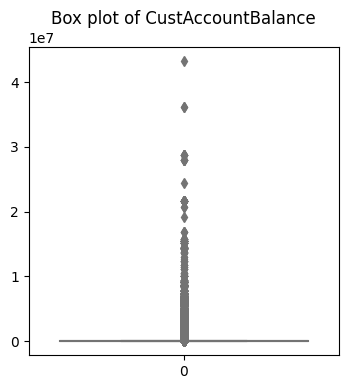

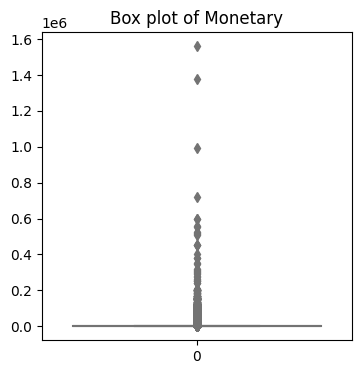

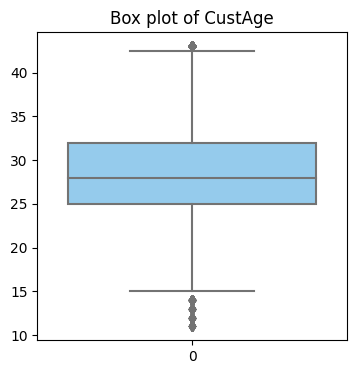

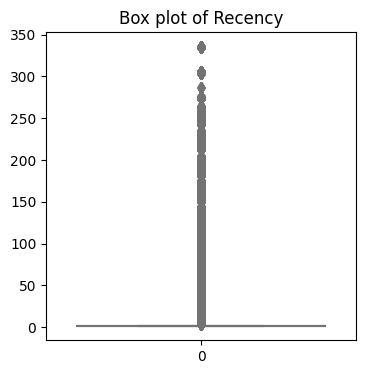

In [34]:
# Outlier detection using box-plot
for col in EDA_df_outliers.columns:
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(data=EDA_df_outliers[col], ax=ax, color = 'lightskyblue')
    ax.set_title('Box plot of ' + col)
    plt.show()

#### Univariate Analysis

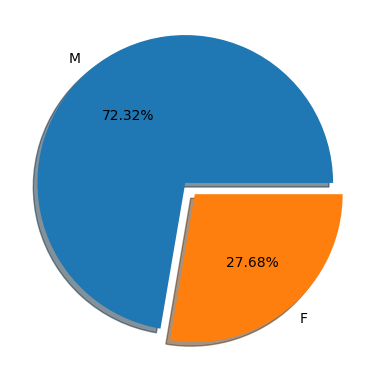

In [36]:
# Plot CustGender propotion
labels_CustGender = EDA_df.CustGender.value_counts().keys()
values_CustGender = EDA_df.CustGender.value_counts().values
explode = (0.1,0)

plt.pie(values_CustGender,labels=labels_CustGender, explode=explode, shadow=True, autopct='%1.2f%%')
plt.show()

In [37]:
# Examine unique location of customers
EDA_df.CustLocation.value_counts()

MUMBAI                          76971
BANGALORE                       62418
NEW DELHI                       58363
GURGAON                         55893
DELHI                           53224
                                ...  
THANI                               1
TIRUMALGERRY SECUNDERADAD           1
CHANDRASEKHARPUR BHUBANESWAR        1
SCHOOL MOHANPUR                     1
13 GORAKHPUR                        1
Name: CustLocation, Length: 7407, dtype: int64

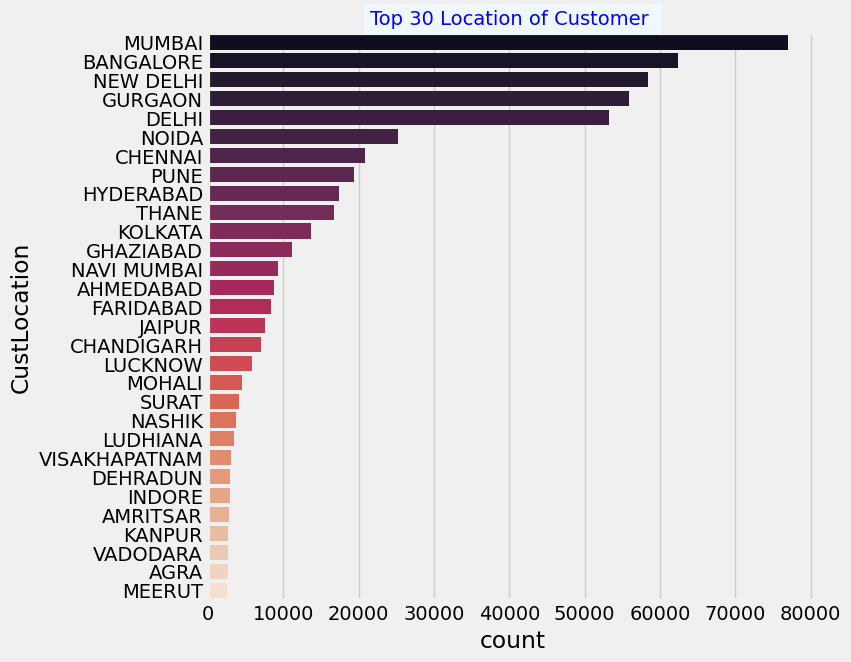

In [43]:
# Plot Top 30 location of Customer
plt.style.use("fivethirtyeight")
plt.figure(figsize=(7,7))
chart=sns.countplot(y='CustLocation',data=EDA_df,palette='rocket', order = EDA_df['CustLocation'].value_counts()[:30].index)
plt.title("Top 30 Location of Customer ",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

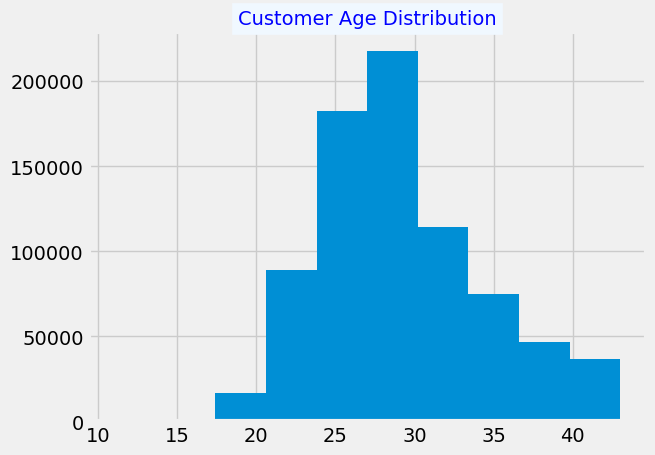

In [45]:
# Plot Customer Age
plt.hist(EDA_df['CustAge'])
plt.title("Customer Age Distribution",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

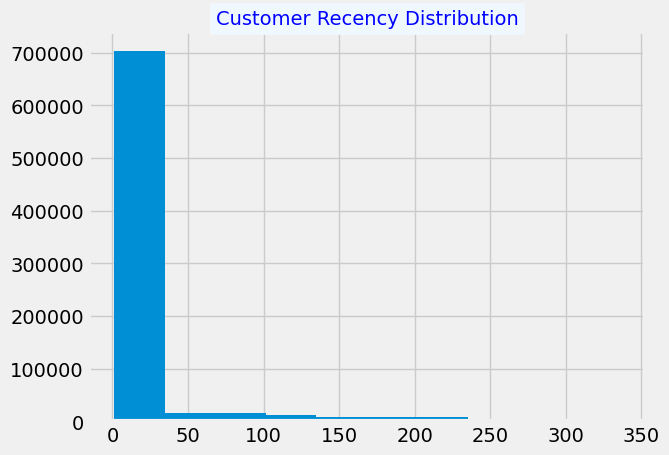

In [46]:
# Plot Recency distribution
plt.hist(EDA_df['Recency'])
plt.title("Customer Recency Distribution",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

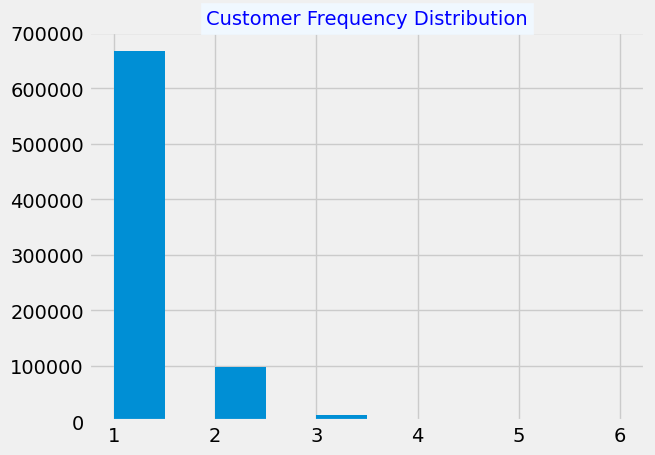

In [47]:
# Plot Frequency distribution
plt.hist(EDA_df['Frequency'])
plt.title("Customer Frequency Distribution",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

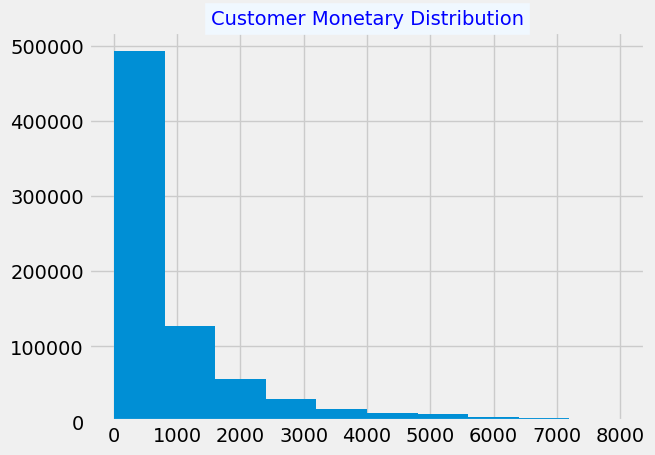

In [48]:
# Plot Monetory distribution
plt.hist(EDA_df['Monetary'],range=[0, 8000])
plt.title("Customer Monetary Distribution",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

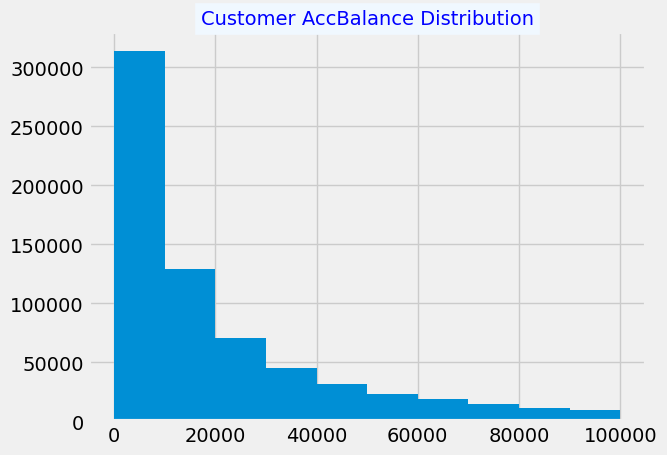

In [49]:
# Plot Account Balance distribution
plt.hist(EDA_df['CustAccountBalance'],range=[0, 100000])
plt.title("Customer AccBalance Distribution",
          fontsize='14',
          backgroundcolor='AliceBlue',
          color='blue');

#### Bivariate Analysis

<Axes: >

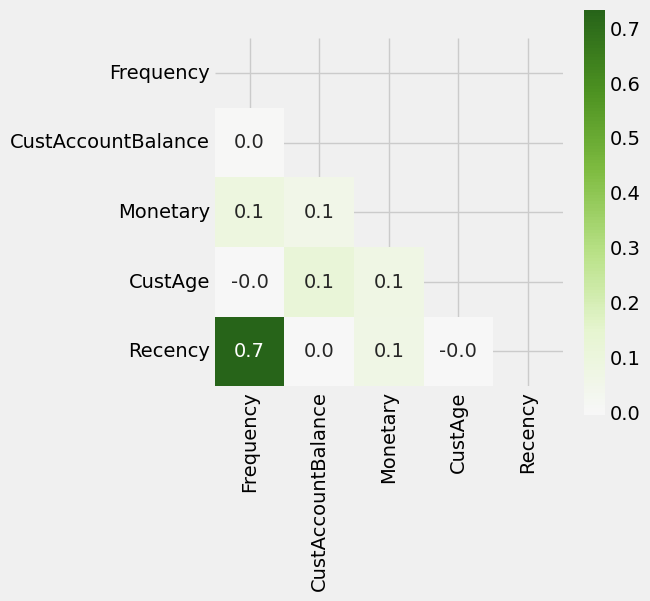

In [50]:
# Generate correlation Analysis
correlations = EDA_df.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

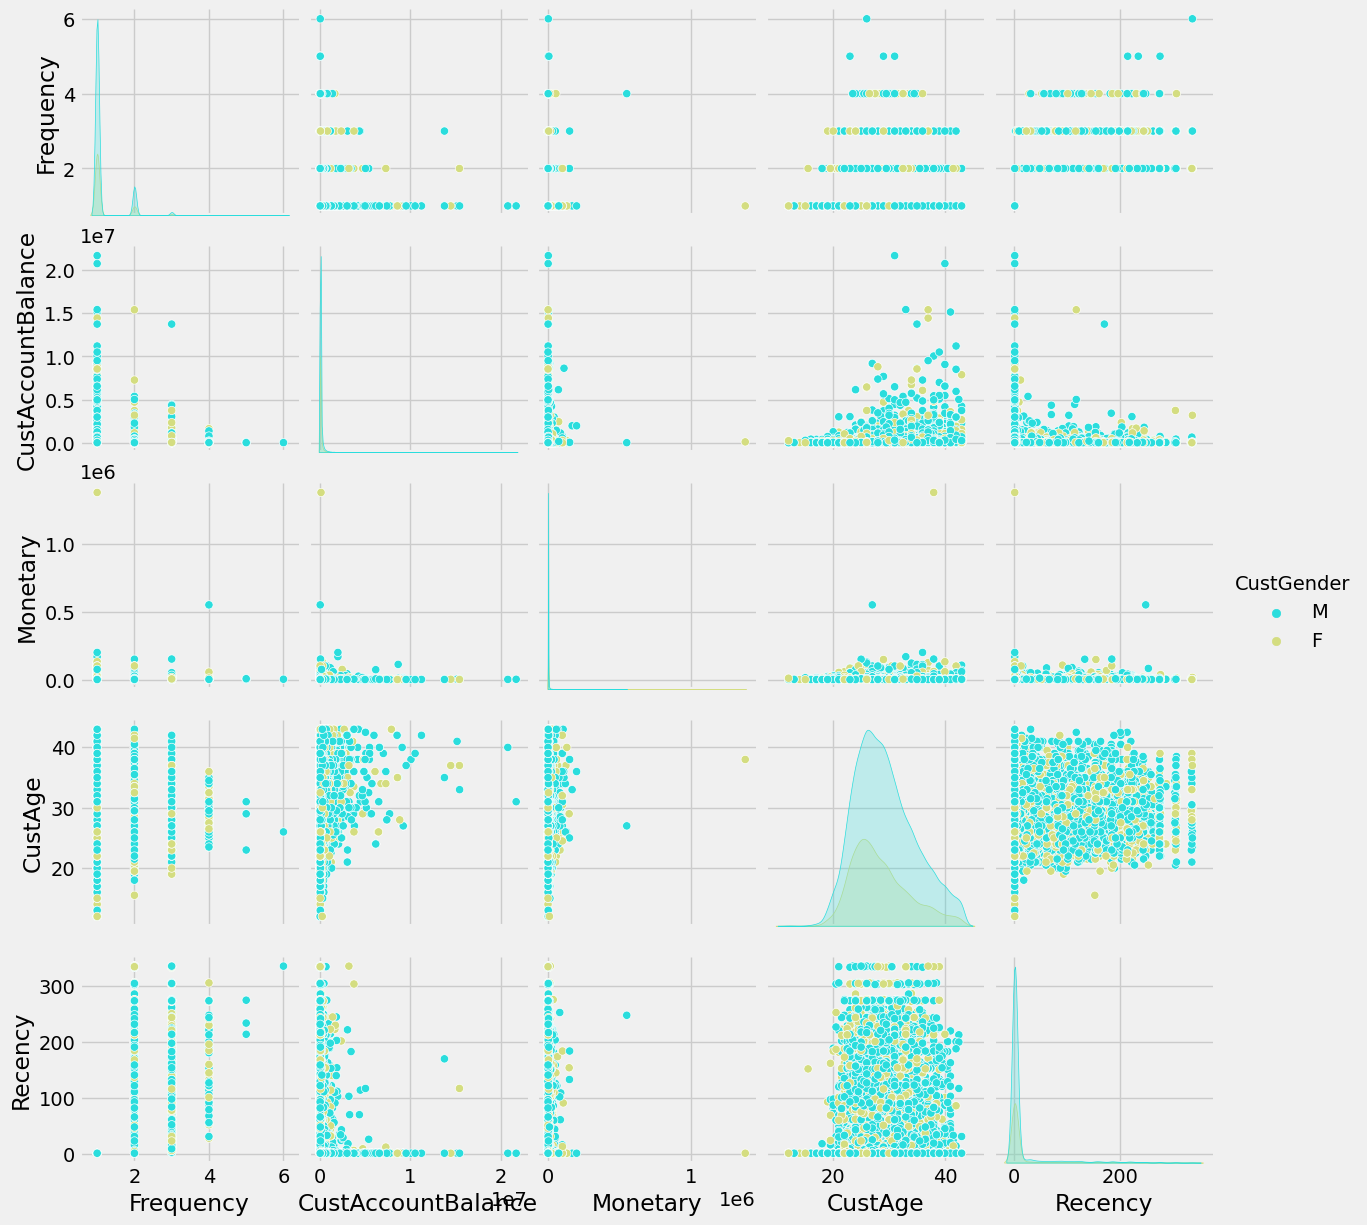

In [51]:
# Generate Pairs Plots
sns.pairplot(EDA_df.sample(n=50000),hue='CustGender',palette='rainbow')

### Sampling

In [53]:
# Create dataframe for clustering
RFM_df_final = RFM_df.drop(columns=["CustomerID","TransactionDate2","TransactionDate1","TransactionDate","CustLocation","CustGender", "CustAge"])
RFM_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Frequency           777356 non-null  int64  
 1   CustAccountBalance  777356 non-null  float64
 2   Monetary            777356 non-null  float64
 3   Recency             777356 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 23.7 MB


In [56]:
# Sample 0.03 % of the original dataset
df_sub = RFM_df_final.sample(frac = 0.03, random_state = 42)

# Reset the index of df_sub_scaled
df_sub.reset_index(drop=True, inplace=True)
df_sub.shape

(23321, 4)

In [57]:
df_sub.head()

,Frequency,CustAccountBalance,Monetary,Recency
0,1,20935.30,200.0,1
1,1,3087857.54,1276.0,1
2,1,132279.82,3805.0,1
3,1,8.75,148.0,1
4,1,9142.87,100.0,1


### Feature Scalilng

In [ ]:
# Feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sub_scaled = pd.DataFrame(scaler.fit_transform(df_sub), columns=df_sub.columns)
df_sub_scaled.head()

,Frequency,CustAccountBalance,Monetary,Recency
0,-0.38,-0.16,-0.29,-0.30
1,-0.38,7.81,-0.04,-0.30
2,-0.38,0.13,0.55,-0.30
3,-0.38,-0.21,-0.30,-0.30
4,-0.38,-0.19,-0.31,-0.30


<Axes: xlabel='PC1', ylabel='PC2'>

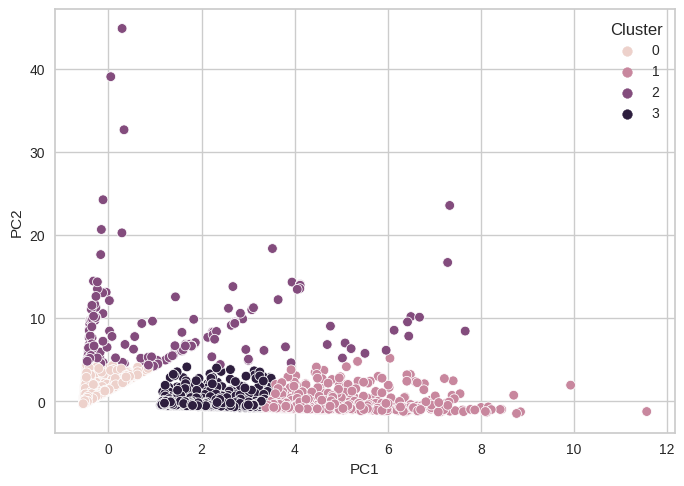

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# feature: ['Frequency', 'CustAccountBalance', 'Monetary', 'CustomerAge', 'Recency','CustGender_F', 'CustGender_M']
# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
#df_sub_pca = pca.fit_transform(df_sub_scaled.drop(['CustGender_F','CustGender_M'], axis =1))
df_sub_pca = pca.fit_transform(df_sub_scaled)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_sub_pca)

# Add the cluster labels to the PCA data
df_sub_pca = pd.DataFrame(df_sub_pca, columns=['PC1', 'PC2'])
df_sub_pca['Cluster'] = kmeans.labels_

# Switch back to original data
df_sub_clustered = pd.concat([df_sub.reset_index(drop=True), df_sub_pca], axis=1)

# Plot the clusters
import seaborn as sns
sns.scatterplot(data=df_sub_clustered, x='PC1', y='PC2', hue='Cluster')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_sub_pca = pca.fit_transform(df_sub_scaled)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_sub_pca)

# Add the cluster labels to the PCA data
df_sub_pca = pd.DataFrame(df_sub_pca, columns=['PC1', 'PC2'])
df_sub_pca['Cluster'] = kmeans.labels_

# Switch back to original data
df_sub_clustered = pd.concat([df_sub.reset_index(drop=True), df_sub_pca], axis=1)

# Plot the clusters
import seaborn as sns
sns.scatterplot(data=df_sub_clustered, x='PC1', y='PC2', hue='Cluster')

In [ ]:
# Get the loadings of each principal component and map them to the original variable names
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_sub_scaled.columns)
print(loadings)

                     PC1   PC2
Frequency           0.69 -0.09
CustGender         -0.02 -0.21
CustAccountBalance  0.02  0.75
Monetary            0.20  0.61
Recency             0.69 -0.11


In [ ]:
# Get the cluster centers for PCA 1 and PCA 2
centroid_pca1, centroid_pca2 = kmeans.cluster_centers_.T

# Print the centroid values for PCA 1 and PCA 2
print('Centroid for PCA 1:', centroid_pca1)
print('Centroid for PCA 2:', centroid_pca2)

Centroid for PCA 1: [-0.49279772  4.73277282  1.3977423   2.0108948 ]
Centroid for PCA 2: [-0.02591367 -0.48333743  8.30370783 -0.20477307]


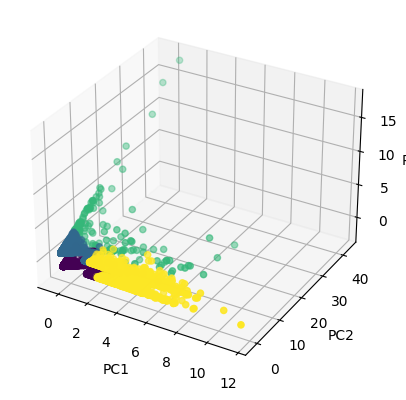

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# feature: ['Frequency', 'CustAccountBalance', 'Monetary', , 'Recency','CustGender_F', 'CustGender_M', CustomerAge]
# Apply PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
df_sub_pca = pca.fit_transform(df_sub_scaled)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_sub_pca)

# Add the cluster labels to the PCA data
df_sub_pca = pd.DataFrame(df_sub_pca, columns=['PC1', 'PC2', 'PC3'])
df_sub_pca['Cluster'] = kmeans.labels_

# Switch back to original data
df_sub_clustered = pd.concat([df_sub.reset_index(drop=True), df_sub_pca], axis=1)

# Plot the clusters
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub_clustered['PC1'], df_sub_clustered['PC2'], df_sub_clustered['PC3'], c=df_sub_clustered['Cluster'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Building clustering models

#### k-Means Clustering

In [ ]:
# Idenfying no. of clusters using Elbow method
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

k_means_viz = KMeans(init = 'k-means++', random_state = 42)

visualizer = KElbowVisualizer(k_means_viz, k=(1,11), timings=False)

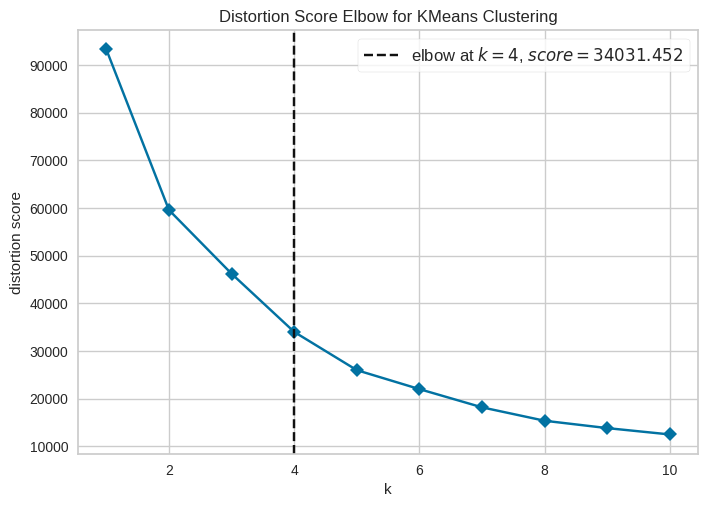

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(df_sub_scaled)
visualizer.show()

In [ ]:
# create the k-means model
k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# fit the model to the scaled data
k_means.fit(df_sub_scaled)

# get the cluster labels for each observation
labels_km = k_means.predict(df_sub_scaled)

# Add a column for the cluster labels
cluster_labels = pd.Series(labels_km, index=df_sub_scaled.index)

In [ ]:
# Copy dataframe for k-means clustering
df_sub_kmeans = df_sub.copy()

# Add the cluster labels to the original dataframe
df_sub_kmeans['Label'] = cluster_labels
df_sub_kmeans.head()

,Frequency,CustAccountBalance,Monetary,Recency,Label
0,1,20935.30,200.00,1,0
1,1,3087857.54,1276.00,1,3
2,1,132279.82,3805.00,1,0
3,1,8.75,148.00,1,0
4,1,9142.87,100.00,1,0


In [ ]:
pca = PCA(n_components=2)
pca_kmeans = pca.fit_transform(df_sub_scaled)
pca_kmeans = pd.DataFrame(data = pca_kmeans, columns=['PCA_1', 'PCA_2'])
pca_kmeans.head()

,PCA_1,PCA_2,PCA_3
0,-0.53,-0.23,0.06
1,-0.39,6.23,4.72
2,-0.36,0.49,-0.41
3,-0.54,-0.28,0.04
4,-0.54,-0.27,0.06


In [ ]:
pca_km_plot = pd.concat([pca_kmeans, pd.DataFrame({'cluster':cluster_labels})], axis = 1)
pca_km_plot.head()

,PCA_1,PCA_2,PCA_3,cluster
0,-0.53,-0.23,0.06,0
1,-0.39,6.23,4.72,3
2,-0.36,0.49,-0.41,0
3,-0.54,-0.28,0.04,0
4,-0.54,-0.27,0.06,0


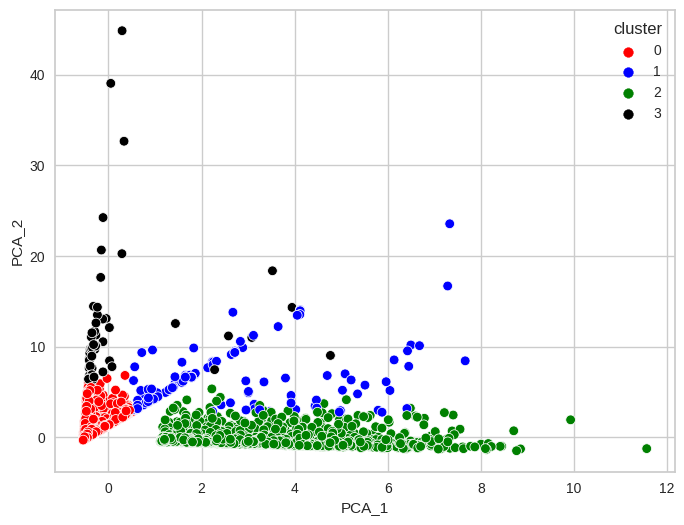

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="cluster", data=pca_km_plot,palette=['red','blue','green', 'black'])
plt.show()
plt.title('Clusters based on RFM + Last Balance', fontsize = 12)

In [ ]:
# Generate evaluation metrics 
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, labels_km)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, labels_km)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.7850288848637171
Calinski-Harabasz index: 13532.497950398647


In [ ]:
# explore number of customers in each clusters
df_sub_kmeans.Label.value_counts().sort_index()

0    19853
1      135
2     3279
3       54
Name: Label, dtype: int64

In [ ]:
# obtain the centroids in the scaled data
centroids_scaled = k_means.cluster_centers_

# Transform the centriods back into orginal data
centroids = scaler.inverse_transform(centroids_scaled)

# display the dataframe without scientific notation
pd.options.display.float_format = '{:.2f}'.format

centriods = pd.DataFrame(centroids, columns=df_sub.columns)
centriods.T

,0,1,2,3
Frequency,1.00,1.30,2.13,1.15
CustAccountBalance,66288.66,216095.86,64702.47,6020118.34
Monetary,1027.25,44028.13,2249.66,2435.41
Recency,1.00,27.80,92.76,13.13


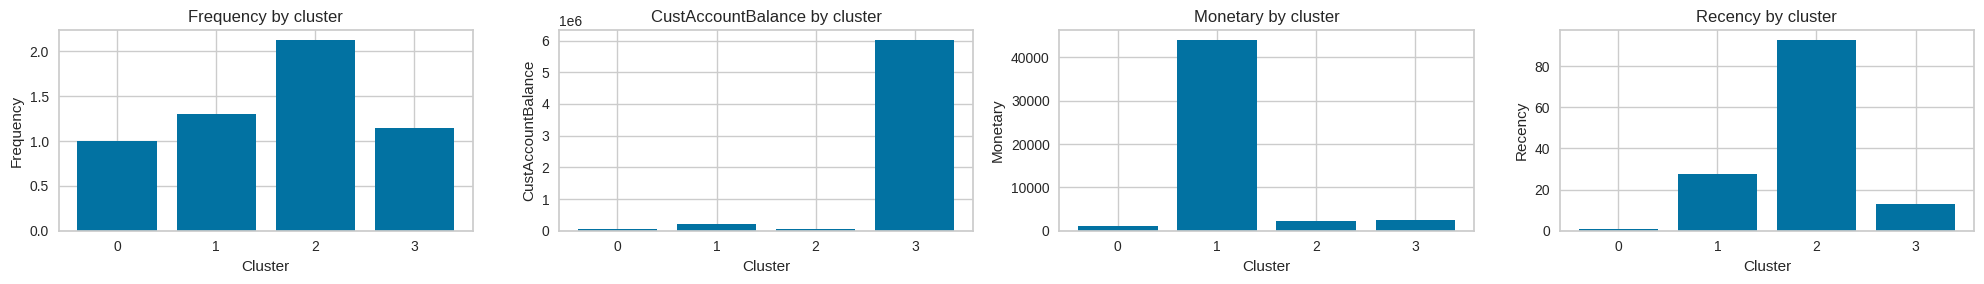

In [ ]:
# Define the number of columns for the subplot grid
num_cols = centriods.shape[1]

# Create a subplot grid with one row and num_cols columns
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 3))

# Loop through each column and plot a bar chart in the corresponding subplot
for i, col in enumerate(centriods.columns):
    axes[i].bar(range(centriods.shape[0]), centriods[col])
    axes[i].set_xticks(range(centriods.shape[0]))
    axes[i].set_xticklabels(centriods.index)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by cluster')
    
# Adjust the spacing between the subplots and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# for c in clusters:
#     grid= sns.FacetGrid(clusters, col='cluster')
#     grid.map(plt.hist, c)

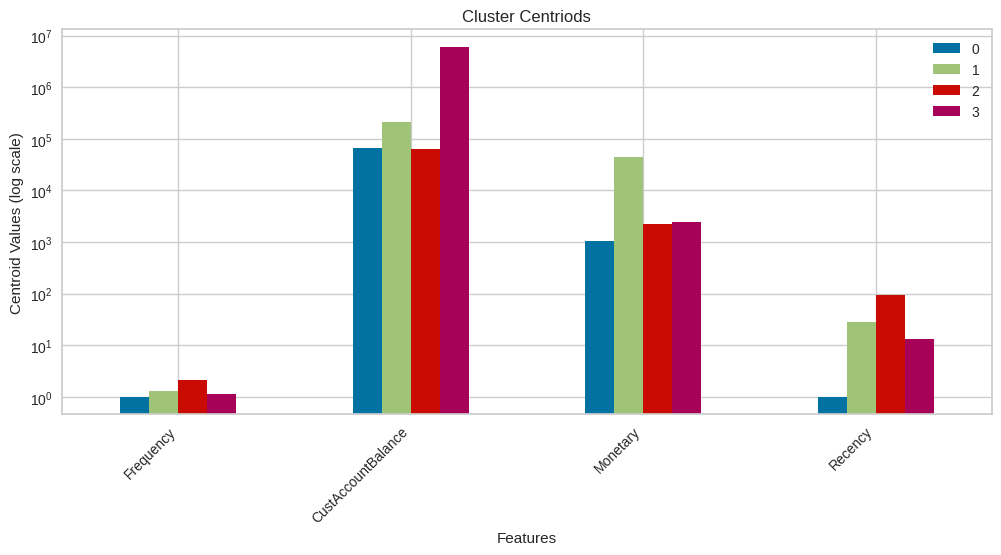

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a bar plot of the centroid values
# sns.set_style("whitegrid")
ax = centriods.T.plot(kind='bar', figsize=(12, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Centroid Values (log scale)')
plt.title('Cluster Centriods')
plt.yscale('log')  # set the y-axis to logarithmic scale
plt.show()

#### Hierarchical Clustering

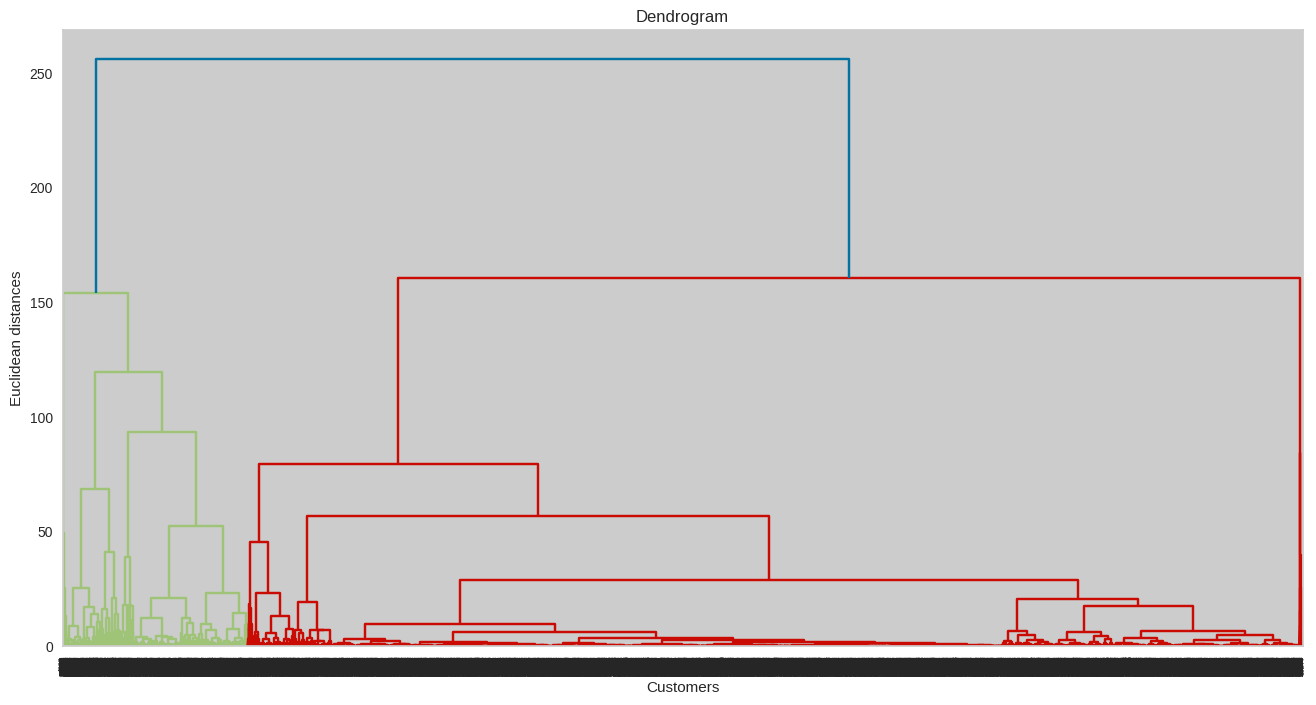

In [ ]:
# Plot Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df_sub_scaled, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Build Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
HClustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

HClustering = HClustering.fit_predict(df_sub_scaled)

df_sub_hc = df_sub.copy()
df_sub_hc['Label'] = HClustering
df_sub_hc.head()

,Frequency,CustAccountBalance,Monetary,Recency,Label
0,1,20935.30,200.00,1,2
1,1,3087857.54,1276.00,1,2
2,1,132279.82,3805.00,1,2
3,1,8.75,148.00,1,2
4,1,9142.87,100.00,1,2


In [ ]:
# Generate Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, HClustering)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, HClustering)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.9388970170136561
Calinski-Harabasz index: 1741.0146667992976


In [ ]:
# explore number of customers in each clusters
df_sub_hc.Label.value_counts()

2    23310
0        8
1        3
Name: Label, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca_hc = PCA(n_components=2)
pca_hc = pca_hc.fit_transform(df_sub_scaled)
pca_hc = pd.DataFrame(data = pca_hc, columns=['PCA_1', 'PCA_2'])
pca_hc_plot = pd.concat([pca_hc, pd.DataFrame({'cluster':HClustering})], axis = 1)
pca_hc_plot.head()

,PCA_1,PCA_2,cluster
0,-0.53,-0.23,2
1,-0.39,6.23,2
2,-0.36,0.49,2
3,-0.54,-0.28,2
4,-0.54,-0.27,2


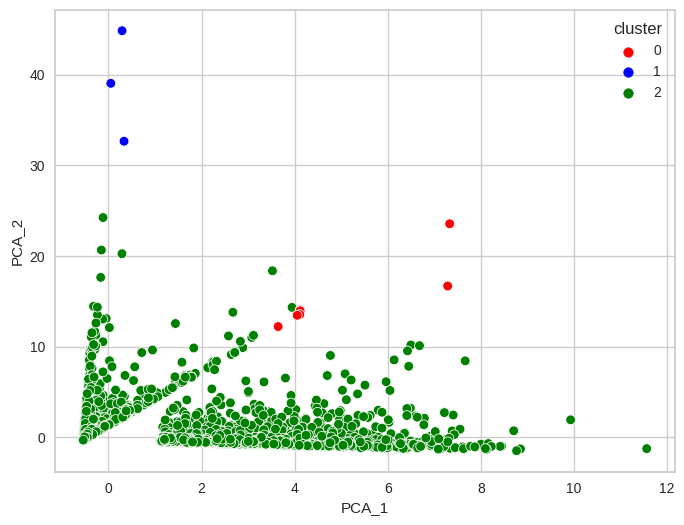

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="cluster", data=pca_hc_plot,palette=['red','blue','green'])
plt.show()

#### DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object with specified hyperparameters
dbscan = DBSCAN(eps=1, min_samples=14)

# Fit DBSCAN to the scaled data
dbscan.fit(df_sub_scaled)

# Get the predicted cluster labels for each data point
labels_dbs = dbscan.labels_

df_sub_hc['Label'] = labels_dbs
df_sub_hc.head()

,Frequency,CustAccountBalance,Monetary,Recency,Label
0,1,20935.30,200.00,1,0
1,1,3087857.54,1276.00,1,0
2,1,132279.82,3805.00,1,0
3,1,8.75,148.00,1,0
4,1,9142.87,100.00,1,0


In [ ]:
from sklearn.decomposition import PCA

pca_dbs = PCA(n_components=2)
pca_dbs = pca_dbs.fit_transform(df_sub_scaled)
pca_dbs = pd.DataFrame(data = pca_dbs, columns=['PCA_1', 'PCA_2'])
pca_dbs_plot = pd.concat([pca_dbs, pd.DataFrame({'cluster':labels_dbs})], axis = 1)
pca_dbs_plot.head()

,PCA_1,PCA_2,cluster
0,-0.53,-0.23,0
1,-0.39,6.23,0
2,-0.36,0.49,0
3,-0.54,-0.28,0
4,-0.54,-0.27,0


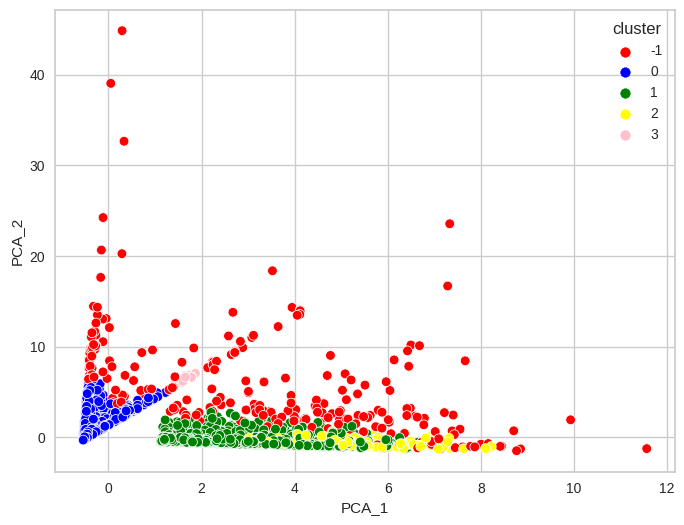

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="cluster", data=pca_dbs_plot,palette=['red','blue','green','yellow','pink','orange','brown','skyblue'])
plt.show()

In [ ]:
df_sub_hc.Label.value_counts()

 0    19888
 1     2846
 2      326
-1      243
 3       18
Name: Label, dtype: int64

### Models Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Coefficient
silhouette_coefficient = silhouette_score(df_sub_scaled, labels_dbs)

# Calculate Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, labels_dbs)

# Generate metrics
print('Evaluation metrics for k-Means Clustering')
print('=========================================')
print('Silhouette Coefficient:', silhouette_coefficient)
print('Calinski-Harabasz Index:', calinski_harabasz_index)
print('=========================================')

Silhouette Coefficient: 0.7629452833357618
Calinski-Harabasz Index: 5663.723996086189


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# define the parameter distributions for the random search
param_dist = {
    'eps': uniform(loc=0.1, scale=99.9),
    'min_samples': randint(2, 100)
}

# create a DBSCAN object
dbscan = DBSCAN()

# create a RandomizedSearchCV object
scorer = make_scorer(silhouette_score)
random_search = RandomizedSearchCV(dbscan, param_distributions=param_dist, scoring=scorer, cv=5)

# fit the random search object to the data
random_search.fit(df_sub_scaled)

# print the best parameters and the corresponding silhouette score
print("Best parameters: ", random_search.best_params_)
print("Best silhouette score: ", random_search.best_score_)

Best parameters:  {'eps': 77.48630574256254, 'min_samples': 6}
Best silhouette score:  nan
